In [1]:
# Import necessary libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import sys
FOLDER_PATH = '../'

In [2]:
# Load files from src folder
src_path = Path(FOLDER_PATH) / 'src'
print(f"Adding {src_path} to sys.path")
sys.path.append(str(src_path))

Adding ..\src to sys.path


In [3]:
# Extract dataframes from dataframe_extraction.py in src folder

from dataframe_extraction import df_bus , df_tramway

c:\Users\maxde\Desktop\Cours\ENTPE 3e année\Data Science\DSPAP\Project data\PT\DSPAP-Project-2025-ARNAUD-DELPLANQUE-GASTARD\ipynb\..\src\dataframe_extraction.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path,index_col = 0)


In [4]:
# Import plotting functions
import plot_functions as pf
#from filter_definitions import *

In [4]:
## Filters list

# Covid period filters
filter_no_covid_tram = (df_tramway['date'] < '2020-03-16')
filter_no_covid_bus = (df_bus['date'] < '2020-03-16')

# Christmas holiday filters
filter_christmas_holiday_tram = ((df_tramway['date'].dt.month == 12) & (df_tramway['date'].dt.day >= 21)) | ((df_tramway['date'].dt.month == 1) & (df_tramway['date'].dt.day <= 5))
filter_christmas_holiday_bus = ((df_bus['date'].dt.month == 12) & (df_bus['date'].dt.day >= 21)) | ((df_bus['date'].dt.month == 1) & (df_bus['date'].dt.day <= 5))

# February holiday filters
filter_february_holiday_tram = ((df_tramway['date'].dt.month == 2) & (df_tramway['date'].dt.day >= 22) | (df_tramway['date'].dt.month == 3) & (df_tramway['date'].dt.day <= 8))
filter_february_holiday_bus = ((df_bus['date'].dt.month == 2) & (df_bus['date'].dt.day >= 22) | (df_bus['date'].dt.month == 3) & (df_bus['date'].dt.day <= 8))

# Filter "Fête des Lumières" from 5th to 8th December
filter_fete_lumieres_tram = ((df_tramway['date'].dt.month == 12) & (df_tramway['date'].dt.day >= 5) & (df_tramway['date'].dt.day <= 8))
filter_fete_lumieres_bus = ((df_bus['date'].dt.month == 12) & (df_bus['date'].dt.day >= 5) & (df_bus['date'].dt.day <= 8))

In [5]:
## Creation of filtered dataframes

df_bus_without_covid = df_bus[filter_no_covid_bus]
df_tramway_without_covid = df_tramway[filter_no_covid_tram]
print("DataFrames without covid period created.")

df_bus_christmas_holiday = df_bus[filter_christmas_holiday_bus]
df_tramway_christmas_holiday = df_tramway[filter_christmas_holiday_tram]
print("DataFrames for Christmas holiday created.")

df_bus_february_holiday = df_bus[filter_february_holiday_bus]
df_tramway_february_holiday = df_tramway[filter_february_holiday_tram]
print("DataFrames for February holiday created.")

df_bus_fete_lumieres = df_bus[filter_fete_lumieres_bus]
df_tramway_fete_lumieres = df_tramway[filter_fete_lumieres_tram]
print("DataFrames for Fête des Lumières created.")

df_bus_no_holiday = df_bus_without_covid[~(filter_christmas_holiday_bus | filter_february_holiday_bus)]
df_tramway_no_holiday = df_tramway_without_covid[~(filter_christmas_holiday_tram | filter_february_holiday_tram)]
print("DataFrames without holidays created.")

DataFrames without covid period created.
DataFrames for Christmas holiday created.
DataFrames for February holiday created.
DataFrames for Fête des Lumières created.


C:\Users\maxde\AppData\Local\Temp\ipykernel_21584\2034246096.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bus_no_holiday = df_bus_without_covid[~(filter_christmas_holiday_bus | filter_february_holiday_bus)]


DataFrames without holidays created.


C:\Users\maxde\AppData\Local\Temp\ipykernel_21584\2034246096.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tramway_no_holiday = df_tramway_without_covid[~(filter_christmas_holiday_tram | filter_february_holiday_tram)]


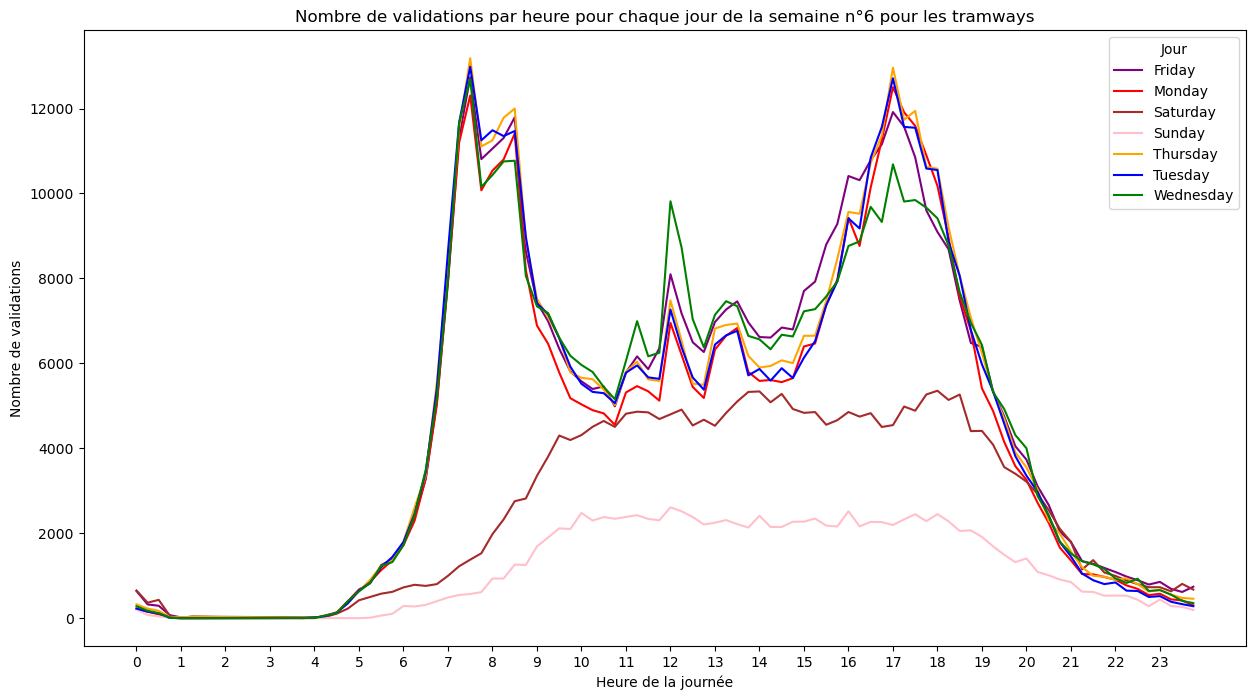

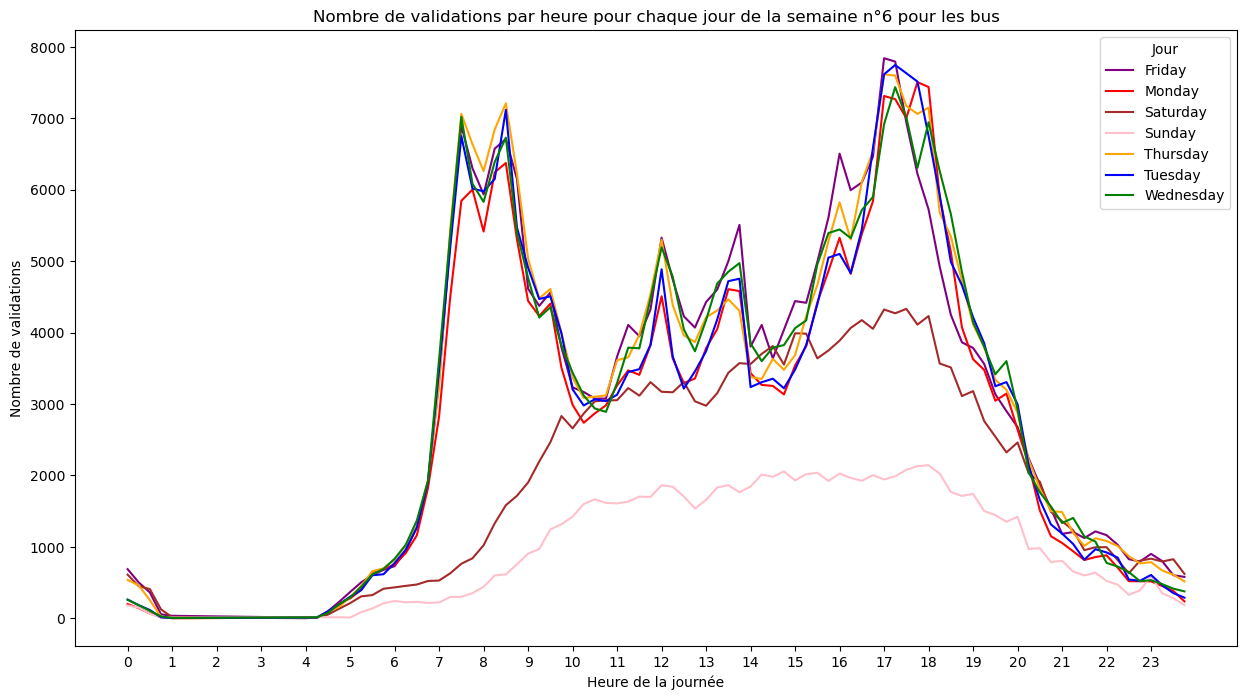

In [6]:
pf.plot_week_data(df_bus, df_tramway, week_nbr=6, color=True, superpose=True)

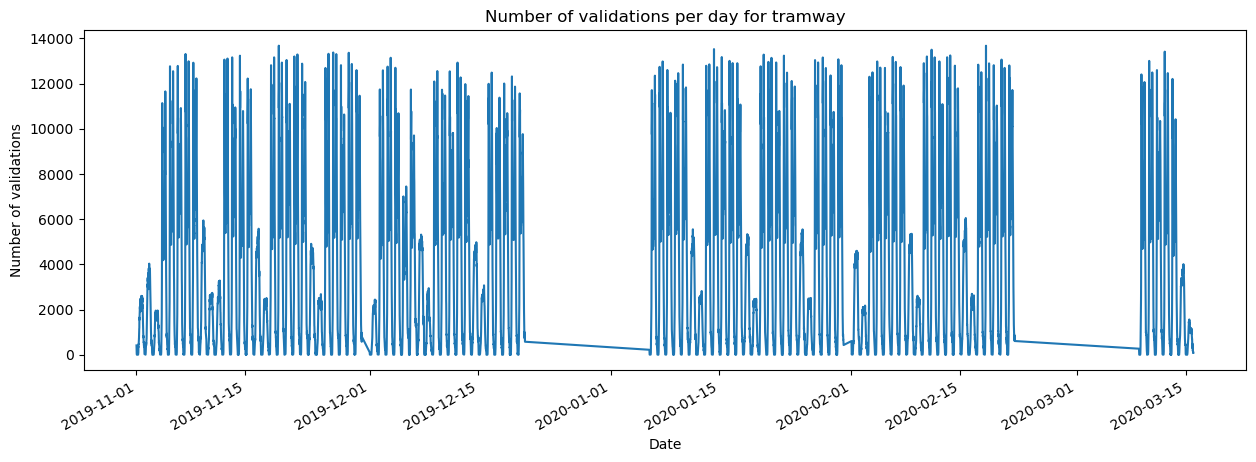

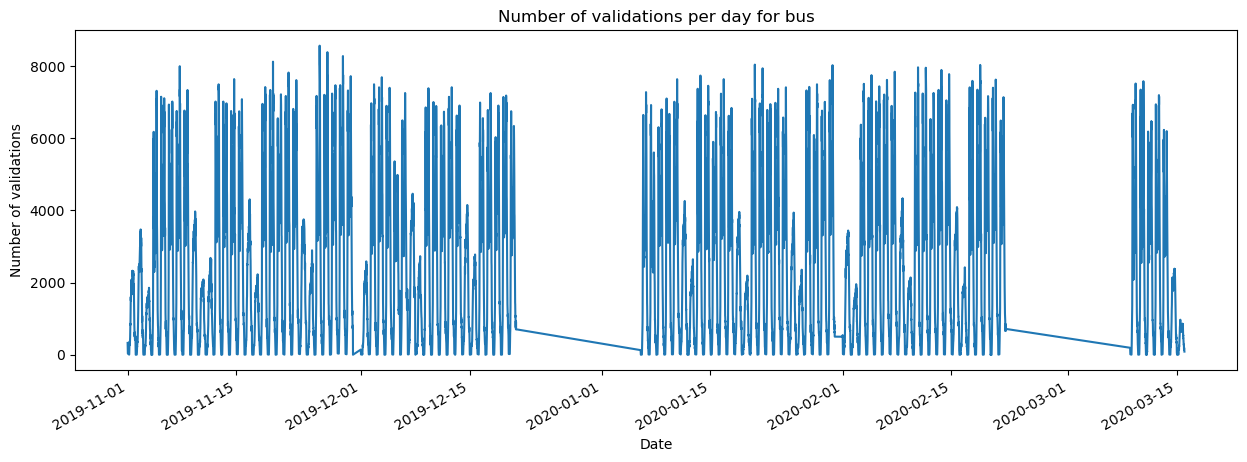

In [7]:
pf.plot_validations(df_bus_no_holiday, df_tramway_no_holiday)

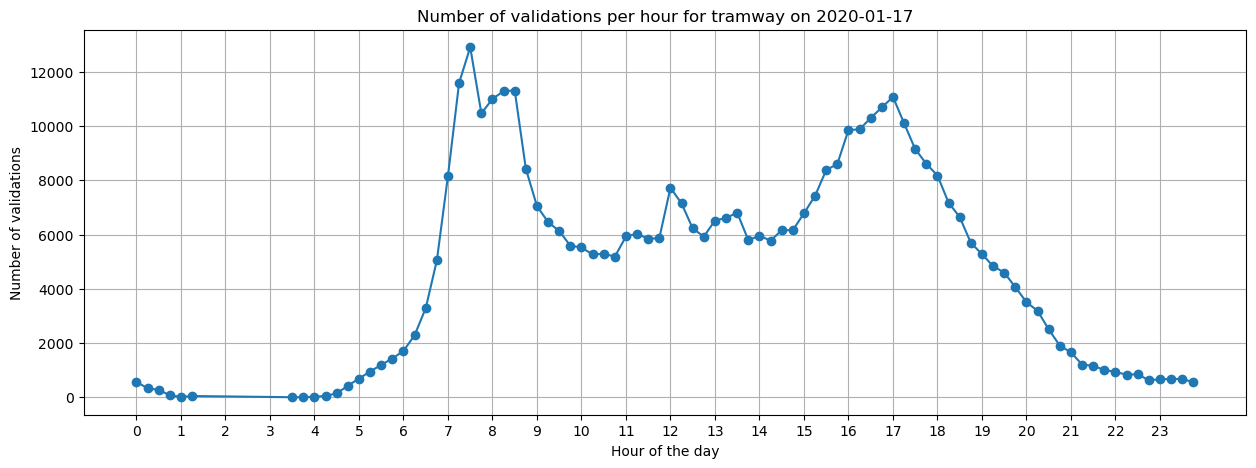

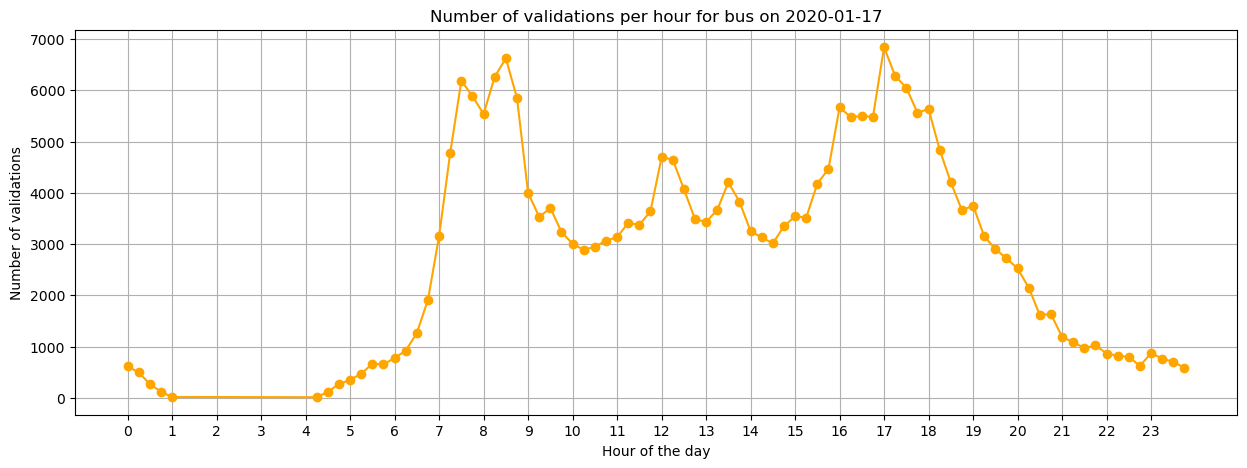

In [8]:
pf.plot_day_data(df_bus, df_tramway, date_str='2020-01-17')

In [9]:
df_bus.head()

,LIG_NUMERO_SAE,VAL_ARRET_CODE,CRS_SENS_TRAJET,COD_LIG_CLI,VAL_DATE,Flow,lon,lat,NOM_PNT,date,date_only
0,2,202,1,2,2019-11-01 12:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-01 12:15:00,2019-11-01
1,2,202,1,2,2019-11-02 10:30:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 10:30:00,2019-11-02
2,2,202,1,2,2019-11-02 12:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 12:00:00,2019-11-02
3,2,202,1,2,2019-11-04 08:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:00:00,2019-11-04
4,2,202,1,2,2019-11-04 08:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:15:00,2019-11-04


In [10]:
df_tramway.head()

,LIG_NUMERO_SAE,VAL_ARRET_CODE,CRS_SENS_TRAJET,COD_LIG_CLI,VAL_DATE,Flow,lon,lat,NOM_PNT,date,date_only
0,520,32102,0,T1,2019-11-02 15:00:00,66,4.827012,45.749599,Perrache,2019-11-02 15:00:00,2019-11-02
1,520,32102,0,T1,2019-11-02 17:30:00,53,4.827012,45.749599,Perrache,2019-11-02 17:30:00,2019-11-02
2,520,32102,0,T1,2019-11-02 17:45:00,72,4.827012,45.749599,Perrache,2019-11-02 17:45:00,2019-11-02
3,520,32102,0,T1,2019-11-02 18:30:00,26,4.827012,45.749599,Perrache,2019-11-02 18:30:00,2019-11-02
4,520,32102,0,T1,2019-11-03 04:45:00,1,4.827012,45.749599,Perrache,2019-11-03 04:45:00,2019-11-03


In [ ]:
df_global = pd.concat([df_bus, df_tramway, df_subway], ignore_index=True)
df_global.head()

,LIG_NUMERO_SAE,VAL_ARRET_CODE,CRS_SENS_TRAJET,COD_LIG_CLI,VAL_DATE,Flow,lon,lat,NOM_PNT,date,date_only
0,2,202,1,2,2019-11-01 12:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-01 12:15:00,2019-11-01
1,2,202,1,2,2019-11-02 10:30:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 10:30:00,2019-11-02
2,2,202,1,2,2019-11-02 12:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 12:00:00,2019-11-02
3,2,202,1,2,2019-11-04 08:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:00:00,2019-11-04
4,2,202,1,2,2019-11-04 08:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:15:00,2019-11-04


In [12]:
df_global = pf.give_time_period(df_global)
df_global.head()

,LIG_NUMERO_SAE,VAL_ARRET_CODE,CRS_SENS_TRAJET,COD_LIG_CLI,VAL_DATE,Flow,lon,lat,NOM_PNT,date,date_only,Time_Period
0,2,202,1,2,2019-11-01 12:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-01 12:15:00,2019-11-01,Semaine classique
1,2,202,1,2,2019-11-02 10:30:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 10:30:00,2019-11-02,Semaine classique
2,2,202,1,2,2019-11-02 12:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 12:00:00,2019-11-02,Semaine classique
3,2,202,1,2,2019-11-04 08:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:00:00,2019-11-04,Semaine classique
4,2,202,1,2,2019-11-04 08:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:15:00,2019-11-04,Semaine classique


In [13]:
df_global["Time_Period"].value_counts()

Time_Period
Semaine classique    10538783
Vacances d'hiver      1421521
Vacances de Noel      1116892
Période COVID          391262
Fête des Lumières      350626
Name: count, dtype: int64

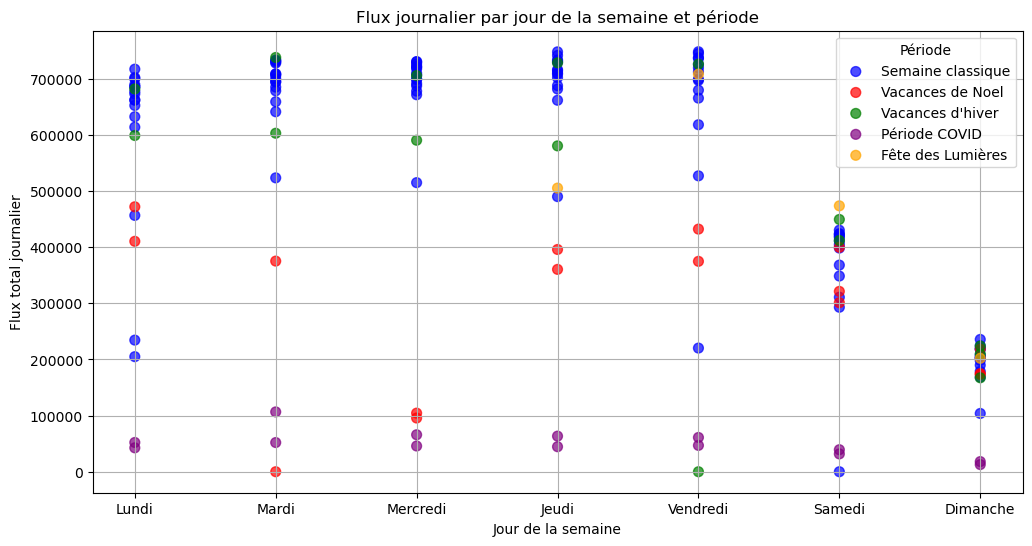

In [14]:
pf.plot_day_variation(df_global)

Date des grèves selon l'IA
| Date/Periode          | Contexte                          | Perturbations principales                                                                 | Efficacité du réseau (métro/tram) | Efficacité du réseau (bus)         |
|----------------------|-----------------------------------|-------------------------------------------------------------------------------------------|-----------------------------------|------------------------------------|
| 5 décembre 2019      | Grève nationale (retraites)       | Fréquence allégée sur certaines lignes de bus                                             | Quasi normale                     | Perturbé (lignes spécifiques)      |
| 17 décembre 2019     | Grève nationale (retraites)       | Très peu d’impact                                                                         | Normale                            | Normale                            |
| 9-10 décembre 2019   | Grève nationale (retraites)       | Aucune perturbation annoncée                                                              | Normale                            | Normale                            |
| Décembre 2019 - mars 2020 | Grèves ponctuelles         | Perturbations limitées, surtout sur les bus, annoncées à l’avance                         | Quasi normale                     | Ponctuellement perturbé           |

c:\Users\maxde\anaconda3\envs\DSPAP\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


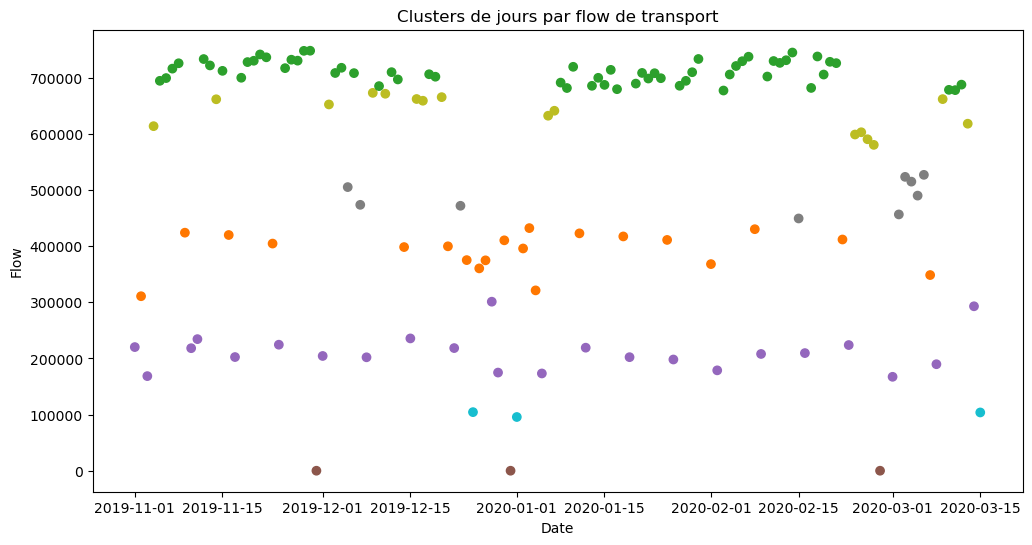

In [37]:
cluster_colors = ['#1f77b4', "#ff7700", '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
date_debut_covid = pd.to_datetime('2020-03-16').date()
df_cluster = pf.cluster_kmeans_days(df_global, n_clusters=7, date_limit=date_debut_covid)
pf.plot_cluster(df_cluster, cmap=cluster_colors[1:])

c:\Users\maxde\Desktop\Cours\ENTPE 3e année\Data Science\DSPAP\Project data\PT\plot_functions.py:266: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.countplot(


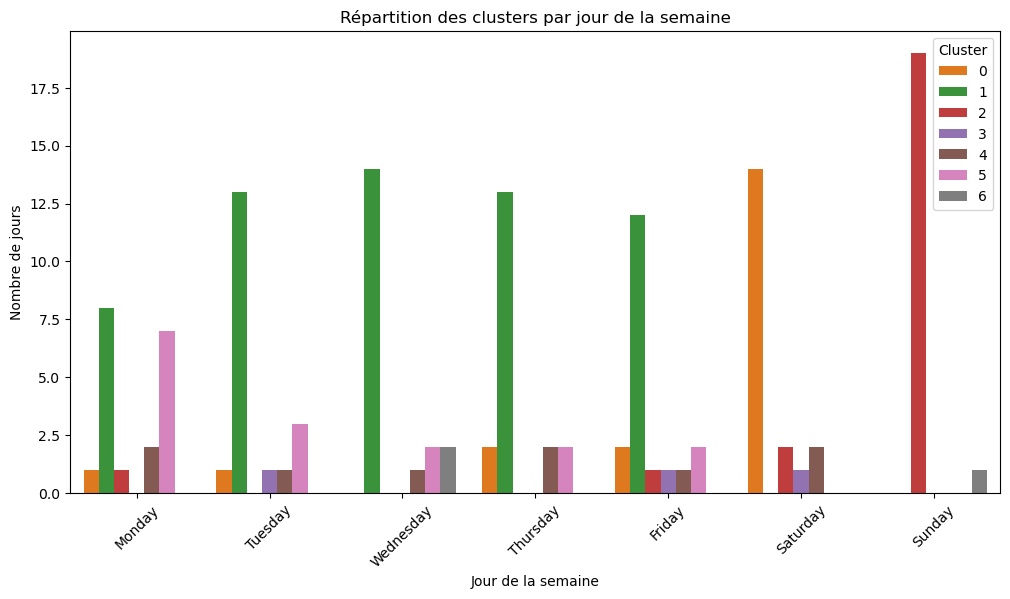

In [38]:
pf.plot_cluster_distribution(df_cluster, cluster_color=cluster_colors[1:])

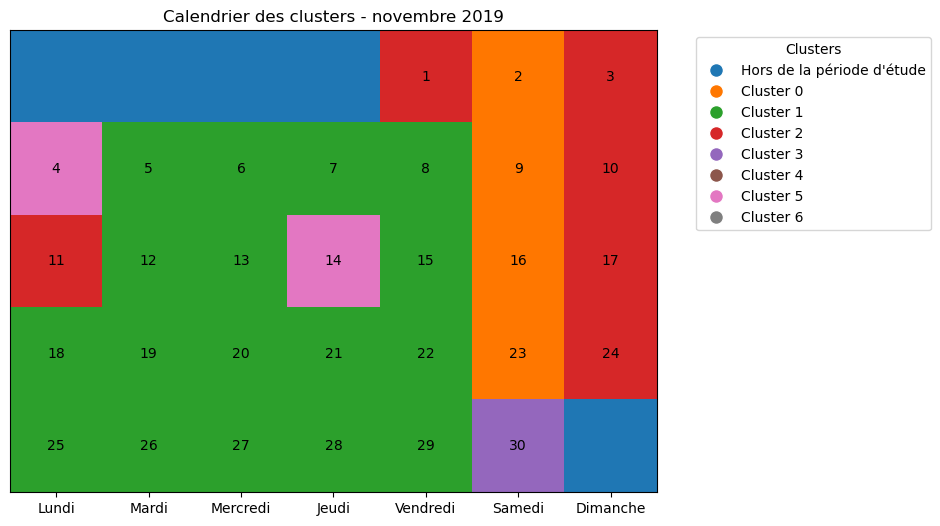

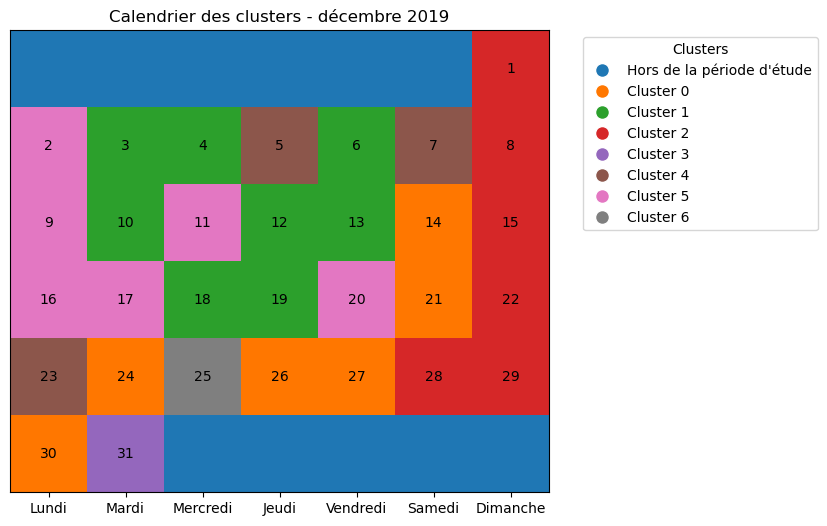

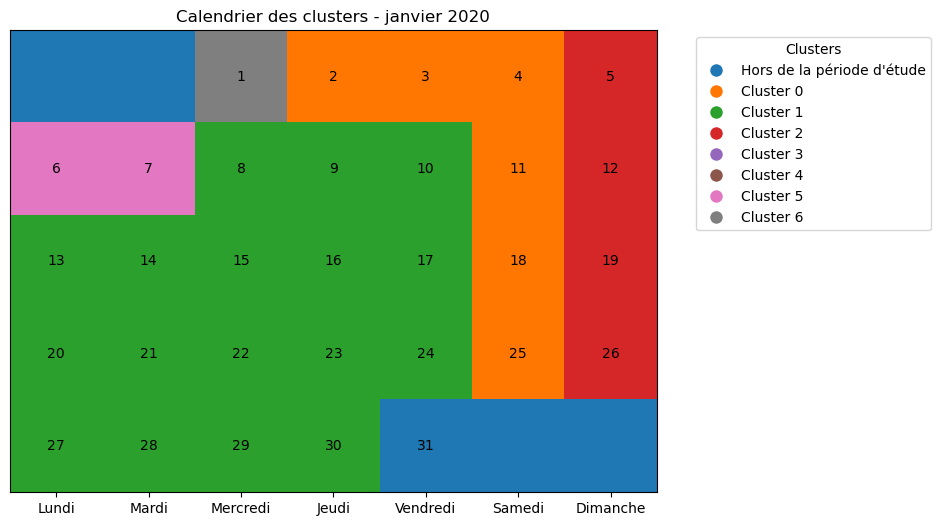

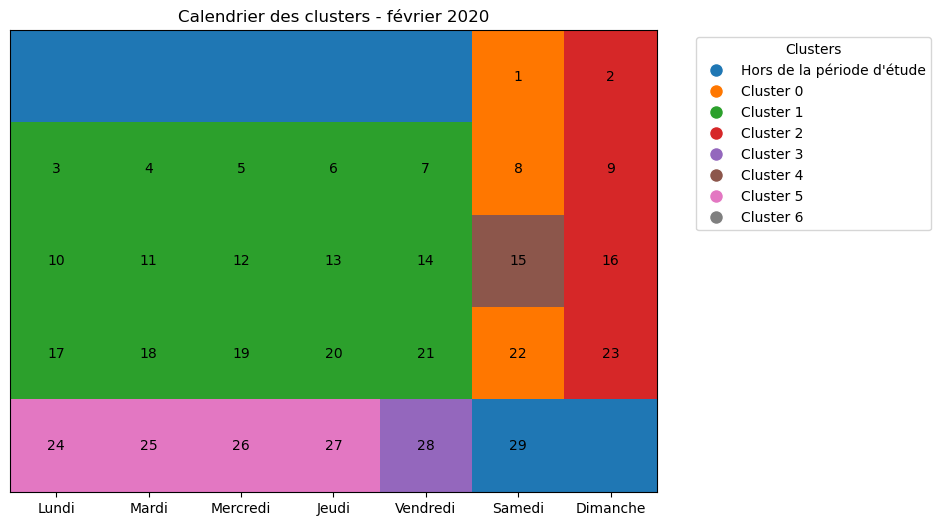

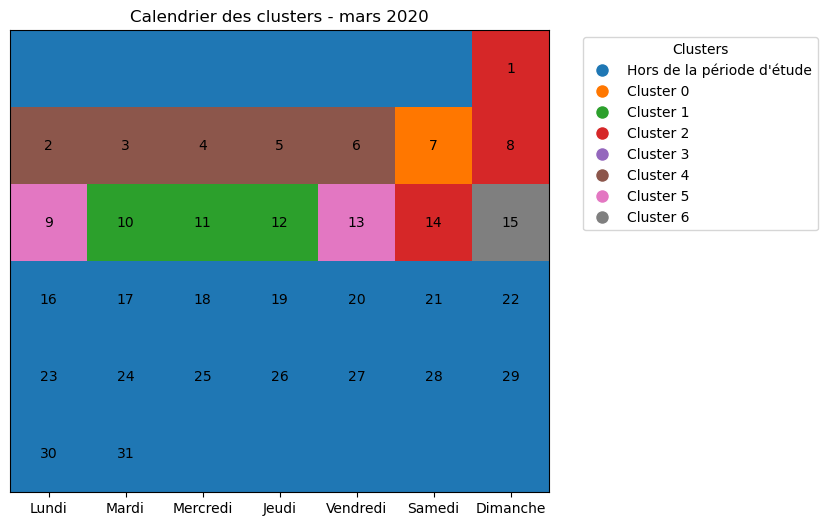

In [40]:
pf.plot_cluster_calendar(df_cluster, year=2019, month=11, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2019, month=12, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2020, month=1, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2020, month=2, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2020, month=3, cluster_col='cluster', cluster_colors=cluster_colors)

In [ ]:
# Point de sauvegarde de df_cluster et df_global
# df_global.to_csv("df_global.csv", index=False)
# df_cluster.to_csv("df_cluster.csv", index=False)

In [ ]:
df_global

,LIG_NUMERO_SAE,VAL_ARRET_CODE,CRS_SENS_TRAJET,COD_LIG_CLI,VAL_DATE,Flow,lon,lat,NOM_PNT,date,date_only,Time_Period
0,2,202,1,2,2019-11-01 12:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-01 12:15:00,2019-11-01,Semaine classique
1,2,202,1,2,2019-11-02 10:30:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 10:30:00,2019-11-02,Semaine classique
2,2,202,1,2,2019-11-02 12:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-02 12:00:00,2019-11-02,Semaine classique
3,2,202,1,2,2019-11-04 08:00:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:00:00,2019-11-04,Semaine classique
4,2,202,1,2,2019-11-04 08:15:00,1,4.808662,45.791424,Bifurcation du Rosay,2019-11-04 08:15:00,2019-11-04,Semaine classique
...,...,...,...,...,...,...,...,...,...,...,...,...
13819079,590,47378,1,T6,2020-03-30 20:15:00,1,4.894064,45.742515,Vinatier - T6,2020-03-30 20:15:00,2020-03-30,Période COVID
13819080,590,47378,1,T6,2020-03-30 21:30:00,1,4.894064,45.742515,Vinatier - T6,2020-03-30 21:30:00,2020-03-30,Période COVID
13819081,590,47378,1,T6,2020-03-30 22:00:00,1,4.894064,45.742515,Vinatier - T6,2020-03-30 22:00:00,2020-03-30,Période COVID
13819082,903,3305,1,C3,2020-02-06 08:00:00,5,4.827918,45.766051,Gare Saint-Paul,2020-02-06 08:00:00,2020-02-06,Semaine classique


             date_only    Flow  flow_normalized  cluster  year  month
date_only                                                            
2019-11-01  2019-11-01  220186        -1.396220        2  2019     11
2019-11-02  2019-11-02  310757        -0.980349        0  2019     11
2019-11-03  2019-11-03  168488        -1.633600        2  2019     11
2019-11-04  2019-11-04  613567         0.410051        1  2019     11
2019-11-05  2019-11-05  694317         0.780828        1  2019     11
1 2019-11-01 True
2 2019-11-02 True
3 2019-11-03 True
4 2019-11-04 True
5 2019-11-05 True
6 2019-11-06 True
7 2019-11-07 True
8 2019-11-08 True
9 2019-11-09 True
10 2019-11-10 True
11 2019-11-11 True
12 2019-11-12 True
13 2019-11-13 True
14 2019-11-14 True
15 2019-11-15 True
16 2019-11-16 True
17 2019-11-17 True
18 2019-11-18 True
19 2019-11-19 True
20 2019-11-20 True
21 2019-11-21 True
22 2019-11-22 True
23 2019-11-23 True
24 2019-11-24 True
25 2019-11-25 True
26 2019-11-26 True
27 2019-11-27 True
28 201

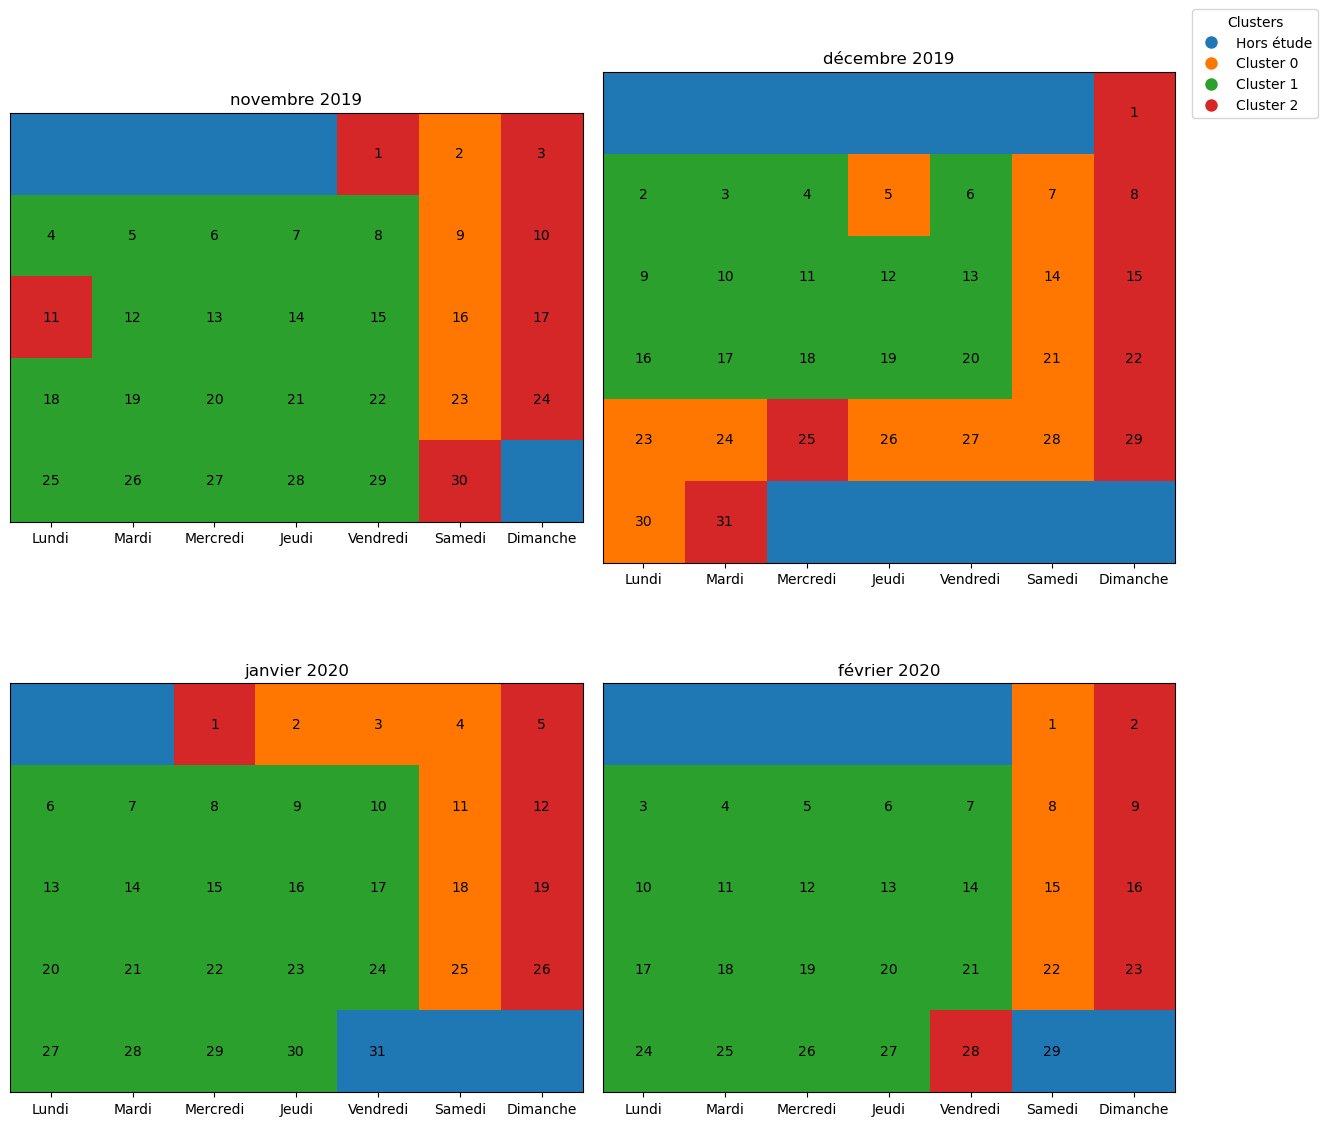

In [ ]:
pf.plot_cluster_calendars_as_subplots(df_cluster, start_year=2019, start_month=11, end_year=2020, end_month=2, cluster_colors=cluster_colors)

## **Création de journées type par cluster**

In [ ]:
# Création de journées types par cluster

df_clustered_days = pf.create_typical_days_per_cluster(df_global, df_cluster, cluster_col='cluster')
df_clustered_days.head()

In [30]:
df_cluster

,date_only,Flow,flow_normalized,cluster
0,2019-11-01,220186,-1.396220,2
1,2019-11-02,310757,-0.980349,0
2,2019-11-03,168488,-1.633600,2
3,2019-11-04,613567,0.410051,4
4,2019-11-05,694317,0.780828,1
...,...,...,...,...
129,2020-03-11,677725,0.704643,1
130,2020-03-12,687504,0.749545,1
131,2020-03-13,617945,0.430154,4
132,2020-03-14,292852,-1.062562,2
